In [1]:
import pandas as pd

df = pd.read_csv('./csv/카드총액증감율09~22.csv')
df

,소비유형코드,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,교육,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험
0,2009/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010/01,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,-14.5,-7.1,-12.8,-13.7,4.6,-11.0
2,2010/02,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,-6.2,1.2,-19.1,-9.7,-7.9,-4.2
3,2010/03,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,54.4,16.4,11.7,23.0,3.2,24.2
4,2010/04,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,-30.9,-15.8,20.8,-2.9,3.4,-14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2021/12,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,18.6,4.0,-0.2,-8.6,8.7,5.3
145,2022/01,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,-5.1,3.2,-4.0,-6.1,19.6,-7.0
146,2022/02,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,-16.4,-8.3,-7.1,-17.4,-24.0,-5.0
147,2022/03,13.2,11.4,23.5,20.3,4.2,15.9,12.2,26.1,39.8,40.3,10.7,-8.8,21.5,8.1,18.0


In [2]:
df.rename(columns={'소비유형코드' : '날짜'}, inplace=True)
# 날짜 컬럼 "/" 제거
df["날짜"] = df["날짜"].str.replace("/", "")

# 날짜 컬럼 int 타입으로 변환
df["날짜"] = df["날짜"].astype(int)

# 날짜 데이터타임 변환 후 인덱스 변환
df["날짜"] = pd.to_datetime(df["날짜"], format='%Y%m')
df["날짜"] = df["날짜"].dt.strftime('%Y-%m')
df.set_index('날짜', inplace=True)

In [3]:
# 컬럼 맞추기
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['전자상거래/통신판매', '식료품', '의류/잡화', '연료', '가구/가전', '의료/보건', '자동차', '여행/교통',
       '스포츠/오락/여가', '서적/문구', '교육', '숙박', '음식점', '공과금/개인및전문서비스', '금융/보험'],
      dtype='object')

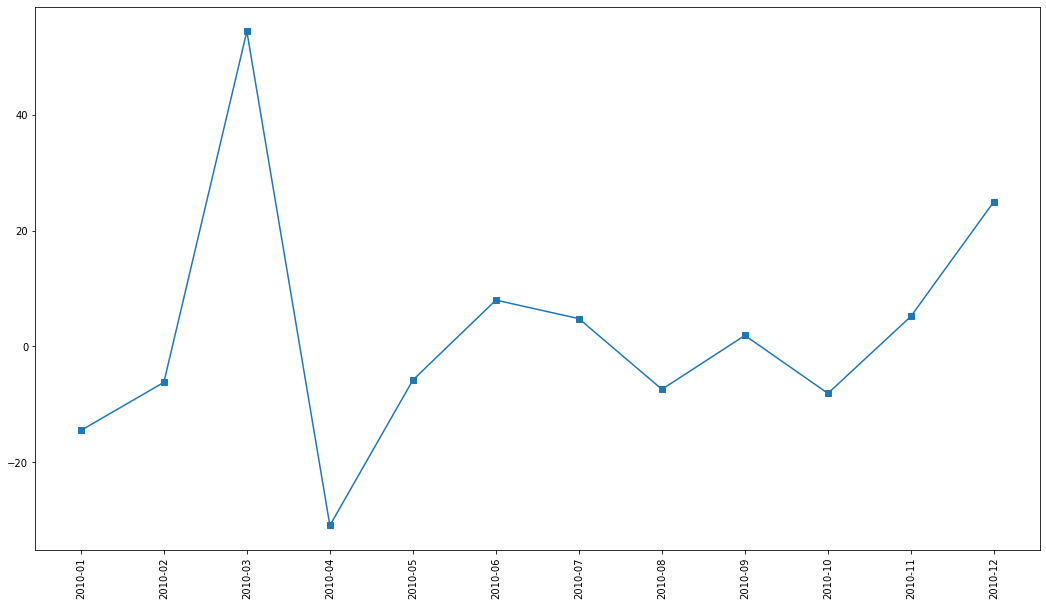

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
plt.plot(df['서적/문구'].iloc[1:13],marker='s')


In [4]:
socell_df = pd.read_csv('./csv/소매판매지수_09~22.csv')
socell_df = socell_df[['시점','총지수']]
socell_df.rename(columns={'시점' : '날짜'}, inplace=True)
socell_df.rename(columns={'총지수' : '소매판매지수'}, inplace=True)
socell_df['날짜'] = socell_df['날짜'].astype(str)
socell_df["날짜"][socell_df["날짜"].str.endswith(".1")] = socell_df["날짜"][socell_df["날짜"].str.endswith(".1")]+"0"
socell_df["날짜"] = pd.to_datetime(socell_df["날짜"], format="%Y.%m")
socell_df["날짜"] = socell_df["날짜"].dt.strftime('%Y-%m')
socell_df['소매판매지수_증감률'] = socell_df['소매판매지수'].pct_change()
socell_df.set_index('날짜', inplace=True)
socell_df

C:\Users\82104\AppData\Local\Temp\ipykernel_12356\3257571250.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socell_df["날짜"][socell_df["날짜"].str.endswith(".1")] = socell_df["날짜"][socell_df["날짜"].str.endswith(".1")]+"0"


,소매판매지수,소매판매지수_증감률
날짜,,
2009-12,91.5,NaN
2010-01,82.8,-0.095082
2010-02,81.4,-0.016908
2010-03,85.8,0.054054
2010-04,84.2,-0.018648
...,...,...
2021-12,127.2,0.020048
2022-01,117.5,-0.076258
2022-02,107.9,-0.081702


In [5]:
cpi_df = pd.read_csv('./csv/소비자물가지수_09~22.csv',encoding='cp949')
cpi_df.rename(columns={'시점' : '날짜'}, inplace=True)
cpi_df.rename(columns={'전국' : '소비자물가지수'}, inplace=True)
cpi_df['날짜'] = cpi_df['날짜'].astype(str)
cpi_df["날짜"][cpi_df["날짜"].str.endswith(".1")] = cpi_df["날짜"][cpi_df["날짜"].str.endswith(".1")]+"0"
cpi_df["날짜"] = pd.to_datetime(cpi_df["날짜"], format="%Y.%m")
cpi_df["날짜"] = cpi_df["날짜"].dt.strftime('%Y-%m')
cpi_df['소비자물가지수_등락률'] = cpi_df['소비자물가지수'].pct_change()
cpi_df.set_index('날짜', inplace=True)
cpi_df

C:\Users\82104\AppData\Local\Temp\ipykernel_12356\3311407127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_df["날짜"][cpi_df["날짜"].str.endswith(".1")] = cpi_df["날짜"][cpi_df["날짜"].str.endswith(".1")]+"0"


,소비자물가지수,소비자물가지수_등락률
날짜,,
2009-12,84.682,NaN
2010-01,85.351,0.007900
2010-02,85.523,0.002015
2010-03,85.696,0.002023
2010-04,86.041,0.004026
...,...,...
2021-12,104.040,0.001637
2022-01,104.690,0.006248
2022-02,105.300,0.005827


In [6]:
weather_df = pd.read_csv('./csv/온도및미세먼지표준편차.csv').fillna(0)
weather_df.rename(columns={'일시' : '날짜'}, inplace=True)
weather_df.columns = weather_df.columns.str.replace(' ','')
weather_df['날짜'] = weather_df['날짜'].astype(str)
weather_df["날짜"] = pd.to_datetime(weather_df["날짜"], format="%Y-%m-%d")
weather_df["날짜"] = weather_df["날짜"].dt.strftime('%Y-%m')
weather_df.set_index('날짜', inplace=True)
weather_df

,평균기온(°C),최저기온(°C),최고기온(°C),강수계속시간(hr),일강수량(mm),평균풍속(m/s),일최심신적설(cm),일최심적설(cm),일미세먼지농도(㎍/㎥)
날짜,,,,,,,,,
2009-12,5.639524,5.916329,5.447568,2.832533,2.117221,0.825299,0.478865,0.983487,55.629380
2010-01,4.454098,4.313774,4.455370,4.640867,2.832295,0.736513,4.626113,8.508715,20.858922
2010-02,5.843497,5.895196,6.361112,5.127056,5.641619,0.613085,1.616859,3.042823,19.463030
2010-03,2.593889,2.596838,3.207250,4.175098,4.895554,0.822166,1.930992,2.857320,42.279598
2010-04,3.315136,3.392807,3.720271,3.084467,5.289347,0.967613,0.000000,0.000000,16.195111
...,...,...,...,...,...,...,...,...,...
2021-12,5.525764,5.700873,5.760335,1.769849,0.644380,0.866944,0.789841,1.152902,18.340624
2022-01,3.003940,3.412006,2.892746,2.671388,0.409642,0.607374,0.715001,0.814440,22.854566
2022-02,4.086076,3.823658,4.460390,2.527725,0.480010,0.710419,0.623228,0.945555,20.151421


In [7]:
# weather_df["날짜"] = pd.to_datetime(weather_df["날짜"], format="%Y-%m-%d")
# weather_df['월'] = weather_df["날짜"].dt.strftime('%Y-%m')
# weather_df

In [8]:
# weather_df['미세먼지_표준편차'] = weather_df.groupby(['월'])['일미세먼지농도(㎍/㎥)'].transform('std')
# weather_df

In [9]:
# ww = pd.DataFrame()
# ww['날짜'] = weather_df['날짜']
# ww['미세먼지_표준편차'] = weather_df.groupby(['월'])['일미세먼지농도(㎍/㎥)'].transform('std')
# ww

In [10]:
total_df = pd.merge(df,socell_df['소매판매지수_증감률'], how='left', right_index=True, left_index=True)
total_df1 = pd.merge(total_df,cpi_df['소비자물가지수_등락률'], how='left', right_index=True, left_index=True)
total_df2 = pd.merge(total_df1, weather_df, how='left', right_index=True, left_index=True)
total_df2 = total_df2.iloc[1:]
#total_df2 = total_df2[:120]
total_df2

,전자상거래/통신판매,식료품,의류/잡화,연료,가구/가전,의료/보건,자동차,여행/교통,스포츠/오락/여가,서적/문구,...,소비자물가지수_등락률,평균기온(°C),최저기온(°C),최고기온(°C),강수계속시간(hr),일강수량(mm),평균풍속(m/s),일최심신적설(cm),일최심적설(cm),일미세먼지농도(㎍/㎥)
날짜,,,,,,,,,,,,,,,,,,,,,
2010-01,-9.1,-10.7,-18.0,-9.6,-17.8,-1.8,-42.6,-6.4,-17.8,-14.5,...,0.007900,4.454098,4.313774,4.455370,4.640867,2.832295,0.736513,4.626113,8.508715,20.858922
2010-02,-6.9,22.1,0.3,-4.0,-0.7,-5.8,2.1,-7.5,-9.0,-6.2,...,0.002015,5.843497,5.895196,6.361112,5.127056,5.641619,0.613085,1.616859,3.042823,19.463030
2010-03,15.7,-14.4,15.8,14.1,46.0,13.6,16.7,10.6,32.1,54.4,...,0.002023,2.593889,2.596838,3.207250,4.175098,4.895554,0.822166,1.930992,2.857320,42.279598
2010-04,-8.5,-0.7,0.8,0.3,-24.1,-3.3,-14.3,8.6,0.3,-30.9,...,0.004026,3.315136,3.392807,3.720271,3.084467,5.289347,0.967613,0.000000,0.000000,16.195111
2010-05,2.0,9.7,9.5,-1.7,5.1,-4.2,-4.0,5.3,12.4,-5.8,...,0.001011,2.452600,2.560150,3.111156,5.237444,11.613096,0.783389,0.000000,0.000000,32.246930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12,1.6,2.7,-5.1,-0.1,-11.4,5.5,4.7,-19.6,-21.0,18.6,...,0.001637,5.525764,5.700873,5.760335,1.769849,0.644380,0.866944,0.789841,1.152902,18.340624
2022-01,-0.3,28.4,-9.7,-1.9,11.3,2.2,-22.4,3.5,-12.7,-5.1,...,0.006248,3.003940,3.412006,2.892746,2.671388,0.409642,0.607374,0.715001,0.814440,22.854566
2022-02,-9.6,-37.9,-18.8,-10.7,-7.5,-12.7,-0.2,-16.0,-7.9,-16.4,...,0.005827,4.086076,3.823658,4.460390,2.527725,0.480010,0.710419,0.623228,0.945555,20.151421


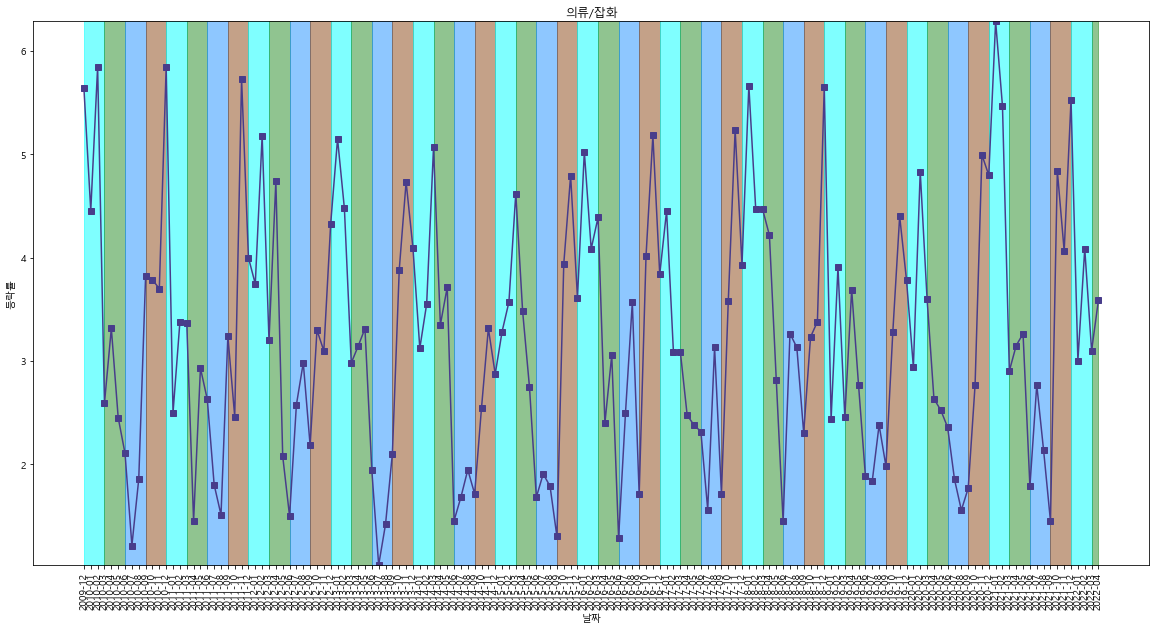

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

x = weather_df.index
y = weather_df["평균기온(°C)"]

ymin, ymax = plt.ylim([weather_df["평균기온(°C)"].min(), weather_df["평균기온(°C)"].max()])

plt.fill_between(x[0:4], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[3:7], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[6:10], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[9:13], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[12:16], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[15:19], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[18:22], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[21:25], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[24:28], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[27:31], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[30:34], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[33:37], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[36:40], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[39:43], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[42:46], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[45:49], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[48:52], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[51:55], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[54:58], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[57:61], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[60:64], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[63:67], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[66:70], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[69:73], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[72:76], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[75:79], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[78:82], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[81:85], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[84:88], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[87:91], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[90:94], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[93:97], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[96:100], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[99:103], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[102:106], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[105:109], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[108:112], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[111:115], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[114:118], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[117:121], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[120:124], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[123:127], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[126:130], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[129:133], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[132:136], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[135:139], ymin, ymax, color='forestgreen', alpha=0.5)
plt.fill_between(x[138:142], ymin, ymax, color='dodgerblue', alpha=0.5)
plt.fill_between(x[141:145], ymin, ymax, color='saddlebrown', alpha=0.5)
plt.fill_between(x[144:148], ymin, ymax, color='cyan', alpha=0.5)
plt.fill_between(x[147:151], ymin, ymax, color='forestgreen', alpha=0.5)

plt.plot(weather_df["평균기온(°C)"], color='darkslateblue',marker='s')

plt.title("의류/잡화")
plt.xlabel("날짜")
plt.ylabel("등락률")
plt.show() 

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


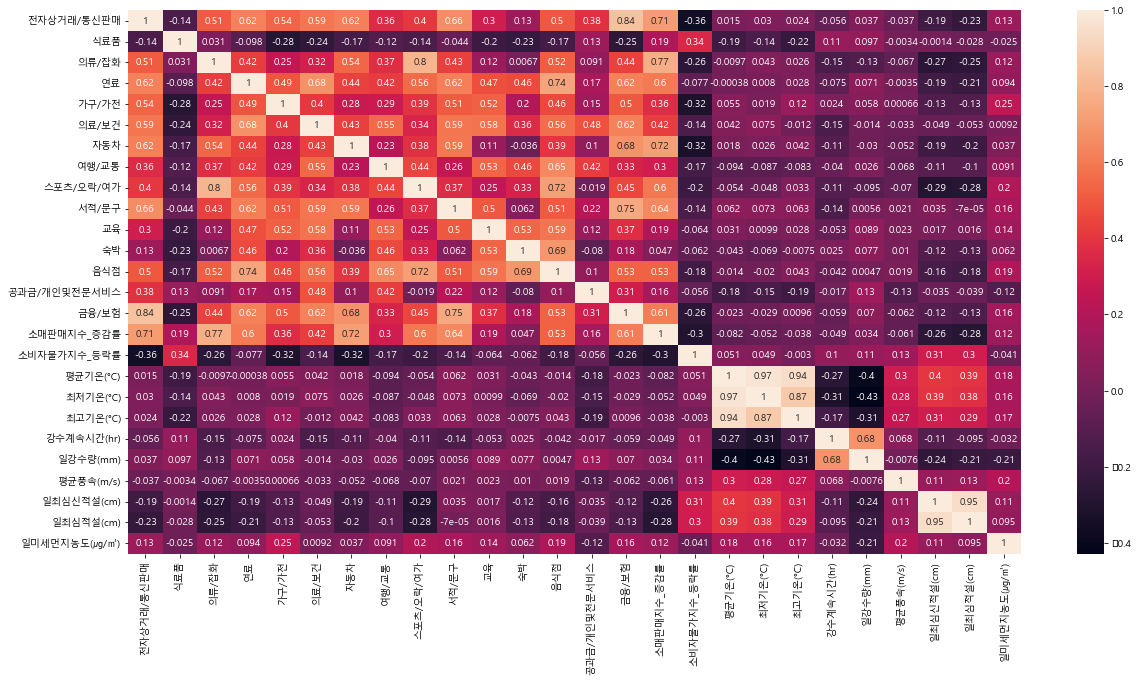

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.figure(figsize=(20,10))
sns.heatmap(total_df2.corr(),annot=True)

In [14]:
from scipy import stats
from scipy.stats import shapiro

# 등락률 컬럼만 추출해서 pvalue 구하는 함수
def shap_pct(df_name):
    pct_colus = []
    pct_colus.append([col for col in df_name])
    for i in pct_colus:
        for j in i:
            shapiro_test = shapiro(df_name[j])
            print(j, "의 pvalue:", shapiro_test.pvalue)

In [15]:
shap_pct(total_df1)

전자상거래/통신판매 의 pvalue: 1.0
식료품 의 pvalue: 1.0
의류/잡화 의 pvalue: 1.0
연료 의 pvalue: 1.0
가구/가전 의 pvalue: 1.0
의료/보건 의 pvalue: 1.0
자동차 의 pvalue: 1.0
여행/교통 의 pvalue: 1.0
스포츠/오락/여가 의 pvalue: 1.0
서적/문구 의 pvalue: 1.0
교육 의 pvalue: 1.0
숙박 의 pvalue: 1.0
음식점 의 pvalue: 1.0
공과금/개인및전문서비스 의 pvalue: 1.0
금융/보험 의 pvalue: 1.0
소매판매지수_증감률 의 pvalue: 1.0
소비자물가지수_등락률 의 pvalue: 1.0


c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


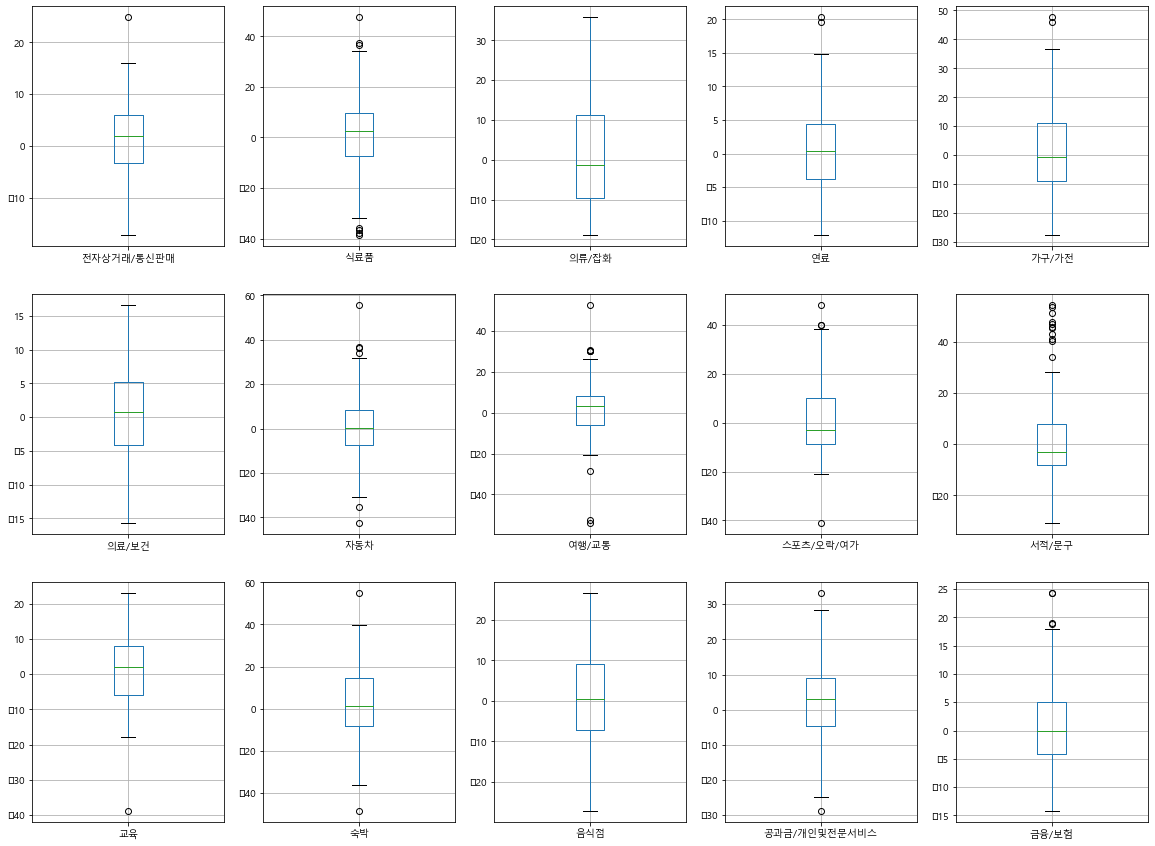

In [16]:
# 이상치 박스플롯
from matplotlib.pyplot import imread

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))


total_df1.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
total_df1.boxplot(column="식료품", ax=axes[0,1])
total_df1.boxplot(column="의류/잡화", ax=axes[0,2])
total_df1.boxplot(column="연료", ax=axes[0,3])
total_df1.boxplot(column="가구/가전", ax=axes[0,4])
total_df1.boxplot(column="의료/보건", ax=axes[1,0])
total_df1.boxplot(column="자동차", ax=axes[1,1])
total_df1.boxplot(column="여행/교통", ax=axes[1,2])
total_df1.boxplot(column="스포츠/오락/여가", ax=axes[1,3])
total_df1.boxplot(column="서적/문구", ax=axes[1,4])
total_df1.boxplot(column="교육", ax=axes[2,0])
total_df1.boxplot(column="숙박", ax=axes[2,1])
total_df1.boxplot(column="음식점", ax=axes[2,2])
total_df1.boxplot(column="공과금/개인및전문서비스", ax=axes[2,3])
total_df1.boxplot(column="금융/보험", ax=axes[2,4])

plt.show()

In [17]:
cols = []

total_df1_iqr = total_df1.copy()
total_df1_iqr = total_df1_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']]
cols.append([col for col in total_df1_iqr])

Q1 = total_df1_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].quantile(q=0.25)

Q3 = total_df1_iqr[['전자상거래/통신판매', '식료품','의류/잡화', 
'연료','가구/가전', '의료/보건', '자동차', '여행/교통', '스포츠/오락/여가', '서적/문구', '교육','숙박','음식점'
,'공과금/개인및전문서비스', '금융/보험']].quantile(q=0.75)

IQR = Q3 - Q1
for i in cols:
    total_df1_iqr[i] = total_df1_iqr[i][(total_df1_iqr[i] <= Q3[i]+1.5*IQR[i]) & (total_df1_iqr[i] >= Q1[i]-1.5*IQR[i])]

c:\Users\82104\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


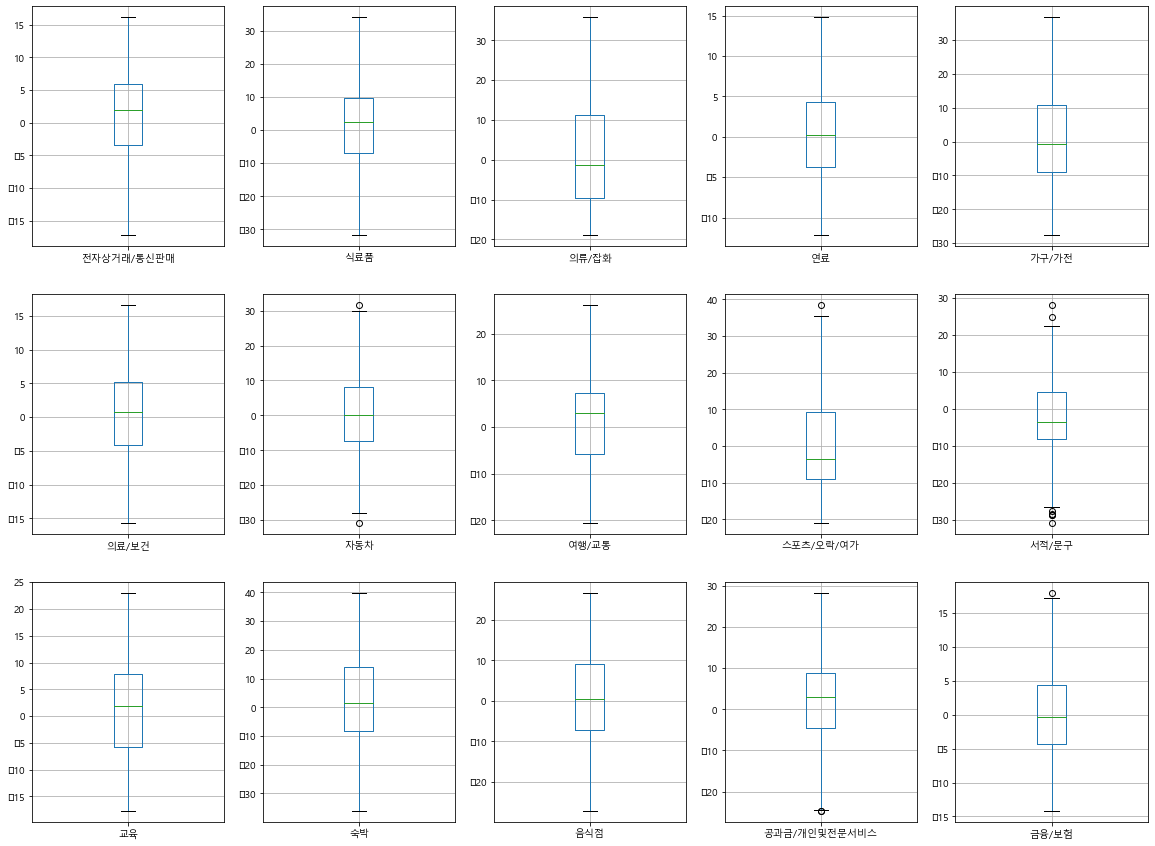

In [18]:
from matplotlib.pyplot import imread

fig, axes = plt.subplots(3, 5)
fig.set_size_inches((20,15))


total_df1_iqr.boxplot(column="전자상거래/통신판매", ax=axes[0,0])
total_df1_iqr.boxplot(column="식료품", ax=axes[0,1])
total_df1_iqr.boxplot(column="의류/잡화", ax=axes[0,2])
total_df1_iqr.boxplot(column="연료", ax=axes[0,3])
total_df1_iqr.boxplot(column="가구/가전", ax=axes[0,4])
total_df1_iqr.boxplot(column="의료/보건", ax=axes[1,0])
total_df1_iqr.boxplot(column="자동차", ax=axes[1,1])
total_df1_iqr.boxplot(column="여행/교통", ax=axes[1,2])
total_df1_iqr.boxplot(column="스포츠/오락/여가", ax=axes[1,3])
total_df1_iqr.boxplot(column="서적/문구", ax=axes[1,4])
total_df1_iqr.boxplot(column="교육", ax=axes[2,0])
total_df1_iqr.boxplot(column="숙박", ax=axes[2,1])
total_df1_iqr.boxplot(column="음식점", ax=axes[2,2])
total_df1_iqr.boxplot(column="공과금/개인및전문서비스", ax=axes[2,3])
total_df1_iqr.boxplot(column="금융/보험", ax=axes[2,4])

plt.show()

In [19]:
# 이상치 인덱스

q1 = total_df1['연료'].quantile(0.25)
q3 = total_df1['연료'].quantile(0.75)
iqr = q3-q1

condition1 = total_df1['연료']>q3+1.5*iqr
condition2 = total_df1['연료']<q1-1.5*iqr
a = total_df1[condition1].index
b = total_df1[condition2].index

print(a)
print(b)

Index(['2015-03', '2022-03'], dtype='object', name='날짜')
Index([], dtype='object', name='날짜')


In [90]:
total_df2 = total_df2.reset_index('날짜')
df_book = total_df2[['날짜','의류/잡화','소비자물가지수_등락률','소매판매지수_증감률','일최심적설(cm)']]

In [91]:
month_df = df_book.copy()
month_df["날짜"] = month_df["날짜"].astype(str)
# 동월 전체 평균
month_df["의류/잡화"][month_df["날짜"].str.endswith("12")].mean()

-3.191666666666667

In [92]:
pre_mean = month_df["의류/잡화"].mean()

In [93]:
# 각 동월 전체 평균 리스트 저장

month_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
month_mean = []
for i in month_list:
    month_mean.append(month_df["의류/잡화"][month_df["날짜"].str.endswith(i)].mean())
month_mean

[-14.599999999999998,
 -7.584615384615384,
 18.176923076923075,
 2.9076923076923076,
 11.466666666666667,
 -12.083333333333334,
 -5.7250000000000005,
 -11.649999999999999,
 14.716666666666669,
 15.983333333333334,
 0.28333333333333327,
 -3.191666666666667]

In [94]:
# "동월_평균_등락률" 컬럼 생성 및 값 저장

month_df["동월_평균_등락률"] = ""
for i in month_list:
        month_df["동월_평균_등락률"][month_df["날짜"].str.endswith(i)]  = month_df["의류/잡화"][month_df["날짜"].str.endswith(i)].mean()
month_df.head(13)

C:\Users\82104\AppData\Local\Temp\ipykernel_5612\1533476874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df["동월_평균_등락률"][month_df["날짜"].str.endswith(i)]  = month_df["의류/잡화"][month_df["날짜"].str.endswith(i)].mean()


,날짜,의류/잡화,소비자물가지수_등락률,소매판매지수_증감률,일최심적설(cm),동월_평균_등락률
0,2010-01,-18.0,0.007900,-0.095082,8.508715,-14.6
1,2010-02,0.3,0.002015,-0.016908,3.042823,-7.584615
2,2010-03,15.8,0.002023,0.054054,2.857320,18.176923
3,2010-04,0.8,0.004026,-0.018648,0.000000,2.907692
4,2010-05,9.5,0.001011,0.042755,0.000000,11.466667
5,2010-06,-12.1,-0.001010,-0.019362,0.000000,-12.083333
6,2010-07,-7.0,0.002011,0.013937,0.000000,-5.725
7,2010-08,-6.8,0.005022,-0.038946,0.000000,-11.65
8,2010-09,13.6,0.007963,0.067938,0.000000,14.716667
9,2010-10,15.8,0.000000,0.012277,0.000000,15.983333


In [95]:
# 동월별 양수 음수 등락률 평균값
import numpy as np

plus = [18.176923, 2.907692, 11.466667, 14.716667, 15.983333, 0.283333]
minus = [-14.6, -7.584615, -12.083333, -5.725, -11.65, -3.191667]

# 평균 구하기
average_plus = np.mean(plus)
average_minus = np.mean(minus)

In [96]:
print(average_plus)
print(average_minus)

10.589102500000001
-9.139102500000002


In [97]:
# "전체_평균_대비" 컬럼 생성 및 값 저장

month_df["전체_평균_대비"] = ""

# 동월 평균 등락률이 전체 평균 보다 높거나 같으면 1, 낮으면 0
for i in range(0, 148):
    if month_df.loc[i, "동월_평균_등락률"] >= 0:
        if month_df.loc[i, "동월_평균_등락률"] >= average_plus:
            month_df.loc[i, "전체_평균_대비"] = 1
        else:
            month_df.loc[i, "전체_평균_대비"] = 0
    elif month_df.loc[i, "동월_평균_등락률"] < 0:
        if month_df.loc[i, "동월_평균_등락률"] >= average_minus:
            month_df.loc[i, "전체_평균_대비"] = 1
        else:
            month_df.loc[i, "전체_평균_대비"] = 0

month_df.tail()

,날짜,의류/잡화,소비자물가지수_등락률,소매판매지수_증감률,일최심적설(cm),동월_평균_등락률,전체_평균_대비
143,2021-12,-5.1,0.001637,0.020048,1.152902,-3.191667,1
144,2022-01,-9.7,0.006248,-0.076258,0.814440,-14.6,0
145,2022-02,-18.8,0.005827,-0.081702,0.945555,-7.584615,1
146,2022-03,23.5,0.007217,0.130677,0.125724,18.176923,1
147,2022-04,14.3,0.007449,-0.021311,0.000000,2.907692,0


In [98]:
df_book["동월_평균_등락률"] = month_df["동월_평균_등락률"]
df_book["전체_평균_대비"] = month_df["전체_평균_대비"]

C:\Users\82104\AppData\Local\Temp\ipykernel_5612\1541011350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["동월_평균_등락률"] = month_df["동월_평균_등락률"]
C:\Users\82104\AppData\Local\Temp\ipykernel_5612\1541011350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["전체_평균_대비"] = month_df["전체_평균_대비"]


In [99]:
df_book.describe()

,의류/잡화,소비자물가지수_등락률,소매판매지수_증감률,일최심적설(cm)
count,148.000000,148.000000,148.000000,148.000000
mean,0.697973,0.001578,0.003218,0.431071
std,12.641409,0.003422,0.053567,1.087370
min,-19.000000,-0.007443,-0.125224,0.000000
25%,-9.700000,-0.000933,-0.034215,0.000000
50%,-1.400000,0.001650,0.006158,0.000000
75%,11.150000,0.003797,0.033637,0.303894
max,35.800000,0.011885,0.162325,8.508715


In [115]:
pd.options.display.max_rows = None

In [100]:
import numpy as np

df_book["날짜"] = df_book["날짜"].astype(str)
df_book["소비"] = ""

for i in range(0, 13):
    for j in range(12, 148):
        # if df_book.loc[i, "날짜"].endswith("03"):
        #     df_book.loc[i, "소비"] = 1
        # else:
        if df_book.loc[i,"의류/잡화"] > 0: 
            if df_book.loc[i,"소매판매지수_증감률"] >= df_book["소매판매지수_증감률"].quantile(q=0.5):
                df_book.loc[i,"소비"] = 1
            elif df_book.loc[i,"소매판매지수_증감률"] >= df_book["소매판매지수_증감률"].quantile(q=0.25):
                if df_book.loc[i,"소비자물가지수_등락률"] <= df_book["소비자물가지수_등락률"].quantile(q=0.75):
                    df_book.loc[i,"소비"] = 1
                else:
                    df_book.loc[i,"소비"] = 0
            elif df_book.loc[i,"소매판매지수_증감률"] < df_book["소매판매지수_증감률"].quantile(q=0.25):
                df_book.loc[i,"소비"] = 0

        elif df_book.loc[i, "의류/잡화"] <= 0:
            if df_book.loc[i,"소매판매지수_증감률"] <= df_book["소매판매지수_증감률"].quantile(q=0.75):
                df_book.loc[i,"소비"] = 0
            elif df_book.loc[i,"소매판매지수_증감률"] > df_book["소매판매지수_증감률"].quantile(q=0.75):
                if df_book.loc[i,"소비자물가지수_등락률"] > df_book["소비자물가지수_등락률"].quantile(q=0.5):
                    df_book.loc[i,"소비"] = 0
                else:
                    df_book.loc[i,"소비"] = 1
                    
                    
        if df_book["의류/잡화"].loc[j] > 0:
            if df_book['의류/잡화'].loc[j-12] > 0:
                if df_book["전체_평균_대비"].loc[j] == 1:
                    df_book.loc[j,"소비"] = 1
                elif df_book["전체_평균_대비"].loc[j] != 1:
                    if df_book.loc[j,'소매판매지수_증감률'] >= 0.006158:
                        if df_book.loc[j,'소비자물가지수_등락률'] > 0.001650:
                            if df_book.loc[j,'일최심적설(cm)'] > 0.303894:
                                df_book.loc[j,"소비"] = 1
                            else:
                                df_book.loc[j,"소비"] = 0
                        else:
                            df_book.loc[j,"소비"] = 1
                    elif df_book.loc[j,'소매판매지수_증감률'] < 0.006158:
                        if df_book.loc[j,'일최심적설(cm)'] > 0.303894:
                            df_book.loc[j,"소비"] = 1
                        else:
                            df_book.loc[j,"소비"] = 0
                        
            elif df_book['의류/잡화'].loc[j-12] <= 0:
                if df_book["전체_평균_대비"].loc[j] == 1:
                    df_book.loc[j,'소비'] = 1
                elif df_book["전체_평균_대비"].loc[j] != 1:
                    if df_book.loc[j,'소매판매지수_증감률'] >= 0.006158:
                        if df_book.loc[j,'소비자물가지수_등락률'] > 0.001650:
                            if df_book.loc[j,'일최심적설(cm)'] > 0.303894:
                                df_book.loc[j,'소비'] = 1
                            else:
                                df_book.loc[j,'소비'] = 0
                        else:
                            df_book.loc[j,'소비'] = 1
                    else:
                        df_book.loc[j,'소비'] = 0
                    
        elif df_book["의류/잡화"].loc[j] <= 0:
            if df_book['의류/잡화'].loc[j-12] <= 0:
                if df_book["전체_평균_대비"].loc[j] == 0:
                    df_book.loc[j,"소비"] =0
                elif df_book["전체_평균_대비"].loc[j] != 0:
                    if df_book.loc[j,'소매판매지수_증감률'] >= 0.006158:
                        if df_book.loc[j,'소비자물가지수_등락률'] > 0.001650:
                            if df_book.loc[j,'일최심적설(cm)'] > 0.303894:
                                df_book.loc[j,'소비'] = 1
                            else:
                                df_book.loc[j,'소비'] = 0
                        else:
                            df_book.loc[j,'소비'] = 1
                    else:
                        df_book.loc[j,'소비'] = 0
                        
            elif df_book['의류/잡화'].loc[j-12] >= 0:
                if df_book.loc[j,'전체_평균_대비'] == 0:
                    df_book.loc[j,'소비'] = 0
                elif df_book.loc[j,'전체_평균_대비'] != 0:
                    if df_book.loc[j,'소매판매지수_증감률'] >= 0.006158:
                        if df_book.loc[j,'소비자물가지수_등락률'] > 0.001650:
                            if df_book.loc[j,'일최심적설(cm)'] > 0.303894:
                                df_book.loc[j,'소비'] = 1
                            else:
                                df_book.loc[j,'소비'] = 0
                        else:
                            df_book.loc[j,'소비'] = 1
                    else:
                        df_book.loc[j,'소비'] = 0
                        
df_book

C:\Users\82104\AppData\Local\Temp\ipykernel_5612\3706837916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["날짜"] = df_book["날짜"].astype(str)
C:\Users\82104\AppData\Local\Temp\ipykernel_5612\3706837916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_book["소비"] = ""


,날짜,의류/잡화,소비자물가지수_등락률,소매판매지수_증감률,일최심적설(cm),동월_평균_등락률,전체_평균_대비,소비
0,2010-01,-18.0,0.007900,-0.095082,8.508715,-14.6,0,0
1,2010-02,0.3,0.002015,-0.016908,3.042823,-7.584615,1,1
2,2010-03,15.8,0.002023,0.054054,2.857320,18.176923,1,1
3,2010-04,0.8,0.004026,-0.018648,0.000000,2.907692,0,0
4,2010-05,9.5,0.001011,0.042755,0.000000,11.466667,1,1
...,...,...,...,...,...,...,...,...
143,2021-12,-5.1,0.001637,0.020048,1.152902,-3.191667,1,1
144,2022-01,-9.7,0.006248,-0.076258,0.814440,-14.6,0,0
145,2022-02,-18.8,0.005827,-0.081702,0.945555,-7.584615,1,0
146,2022-03,23.5,0.007217,0.130677,0.125724,18.176923,1,1


In [101]:
df_book.to_csv('test.csv',encoding='utf-8')